In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
seed = 6
np.random.seed(seed)
training_set = pd.read_csv('fashion-mnist_train.csv')
test_set = pd.read_csv('fashion-mnist_test.csv')

In [3]:
X = training_set.iloc[:, 1:].values
labels = training_set.iloc[:, 0].values

iloc는 행렬을 인덱스로 접근할 수 있게 해준다.
training_set.iloc[:,1:].values 는 training_set의 [0~행의 끝, 1~열의 끝]을 의미한다.

In [4]:
X = X.reshape(-1,28,28,1)
X.shape

(60000, 28, 28, 1)

In [5]:
for i in range(0,36):
  print(labels[i],sep='\n')

2
9
6
0
3
4
4
5
4
8
0
8
9
0
2
2
9
3
3
3
8
7
4
4
0
4
4
8
7
1
5
0
5
3
2
7


0 - 반팔
1 - 바지?
2 - 긴팔
3 - 원피스, 드레스
4 - 긴옷
5 - 샌들
6 - 셔츠
7 - 운동화
8 - 가방
9 - 스니커즈




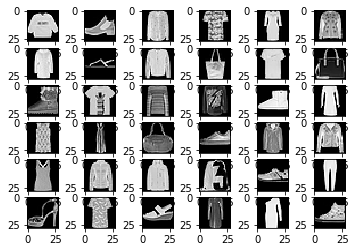

In [6]:
pixels_x = 28
pixels_y = 28

for i in range(0,36):
    plt.subplot(6,6,i+1)
    img = X[i].reshape(pixels_x, pixels_y)
    plt.imshow(img, cmap = 'gray')

plt.show()

subplot(a,b,c)에서 a는 행의 수, b는 열의 수, c는 plot_number를 의미한다.
위 코드에서는 3, 3, i+1을 두었기 때문에 3x3짜리 이미지 행렬이 나온것이다.
근데 왜 커널 코드에선 subplot(330+1+i)라고 썼을까?

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_validation, labels_train, labels_validation = train_test_split(X, labels, test_size = 0.2, random_state = 0)

종속변수_train, 종속변수_validation, 독립변수_train, 독립변수_validation=train_test_split(독립변수행렬,종속변수행렬,검증용 데이터 크기,학습용 데이터 크기, 난수 시드)
이 때, 검증용 데이터 크기와 학습용 데이터 크기는 둘 중 하나만 명시해도 된다

In [8]:
X_train = X_train.astype('float32')/255.0
X_validation = X_validation.astype('float32')/255.0

# converting the numeric class labels to binary form with one hot encoding
labels_train = tf.keras.utils.to_categorical(labels_train)
labels_validation = tf.keras.utils.to_categorical(labels_validation)

labels_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D  
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout

In [10]:
model = Sequential()

# first convolutional and max pooling layers
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# second convolutional and max pooling layers
model.add(Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())  

model.add(Dense(128, activation='relu'))     # fully connected layer
model.add(Dense(10, activation='softmax'))  # output layer

# Compiling CNN
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

Dropout : 학습단계의 각 레이어에서 일정 특징들을 학습시키지 않는법.(오버피팅을 막아줌) 학습하지 않는 데이터는 랜덤하게 주어진 비율만큼 drop함.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [12]:
history = model.fit(X_train, labels_train, validation_data = (X_validation, labels_validation), batch_size = 100, epochs = 10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 97us/sample - loss: 0.5483 - accuracy: 0.7995 - val_loss: 0.3763 - val_accuracy: 0.8696
Epoch 2/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3663 - accuracy: 0.8687 - val_loss: 0.3160 - val_accuracy: 0.8858
Epoch 3/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3201 - accuracy: 0.8858 - val_loss: 0.3172 - val_accuracy: 0.8811
Epoch 4/10
48000/48000 [==============================] - 3s 54us/sample - loss: 0.2879 - accuracy: 0.8954 - val_loss: 0.2594 - val_accuracy: 0.9080
Epoch 5/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.2600 - accuracy: 0.9050 - val_loss: 0.2582 - val_accuracy: 0.9043
Epoch 6/10
48000/48000 [==============================] - 3s 55us/sample - loss: 0.2434 - accuracy: 0.9106 - val_loss: 0.2364 - val_accuracy: 0.9126
Epoch 7/10
48000/48000 [==============================] 

In [13]:
scores = model.evaluate(X_validation, labels_validation, verbose = 1)
print ('Accuracy : {}'.format(scores[1]))

12000/12000 [==============================] - 1s 53us/sample - loss: 0.2537 - accuracy: 0.9094
Accuracy : 0.909416675567627


In [14]:
X_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values

X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test.astype('float32')/255.0

X_test.shape

(10000, 28, 28, 1)

In [15]:
# predicting and storing the values in y_pred
y_pred = model.predict(X_test)
# selecting the class with highest probability
y_pred = np.argmax(y_pred, axis = 1)

from sklearn.metrics import accuracy_score
print ('Accuracy on Test Set = {:0.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy on Test Set = 0.92


In [16]:
y_pred

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [17]:
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

In [18]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
X_test.shape

(10000, 28, 28, 1)